***
# The Sparks Foundation
## Data Science and Business Analytics Internship #GRIPFEB21
#### Task 2 - _Prediction Using Unsupervised Machine Learning_
***

__Name__ : Pratik Mahadev Ghodke
***
In this task, we are working on a simple `unsupervised machine learning model` to make some predictions on given dataset. Unsupervised learning is a type of machine learning in which we `don't have target variable`. So we have to look for pattern / categories in dataset to make predictions.<br>
Here, we have a simple dataset which represents `Iris flower species` along with their `Sepal and Petal Sizes`. Our task is to classify species by considering to their flower specs. For this purpose I have used __K-Nearest Neighbours__ classification algorith.
***

# Imports and Data Collection
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting up graph and font sizes for matplotlib graphs

%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (12, 6)
matplotlib.rcParams["font.size"] = 14

In [3]:
# Import data

data = pd.read_csv("Iris.csv", index_col=0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

***
# Data Exploration
***
This dataset contains `150 rows` and `5 columns`. 5 columns represents - Sepal height and width, Petal height and width and Species of Iris flower. Looks like there are `no null values` in dataset. Hence, there is no need to process data. Let's take a look visually on the data!
***

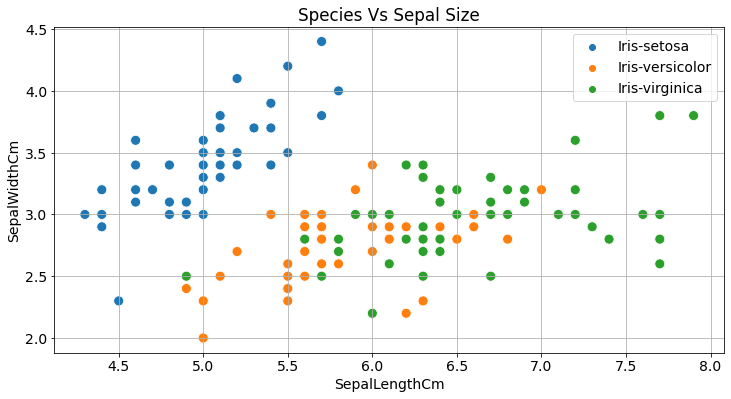

In [5]:
plt.grid()
sns.scatterplot(x=data.SepalLengthCm, y=data.SepalWidthCm, hue=data.Species, s=100)
plt.title("Species Vs Sepal Size")
plt.legend()
plt.show()

***
In above graph, it's not clear but we can definitely distinguish between `three classes`.
> `Iris Setosa` - Flowers with less Sepal length and more Sepal width. <br>
`Iris Versicolor` - Flowers with less or average Sepal length and Sepal width. <br>
`Iris Virginica` - Flowers with average or more Sepal length and less or average Sepal width.
***

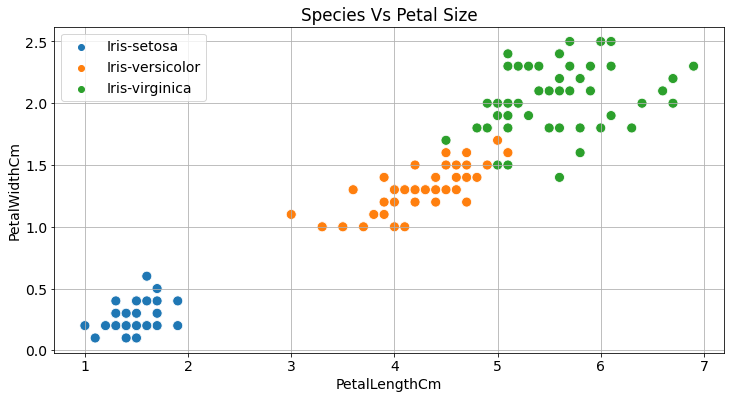

In [6]:
plt.grid()
sns.scatterplot(x=data.PetalLengthCm, y=data.PetalWidthCm, hue=data.Species, s=100)
plt.legend()
plt.title("Species Vs Petal Size")
plt.show()

***
For `Petal length and height`, it is quite clear that for different species of flower there is certainly unique criteria regarding petal sizes.
***

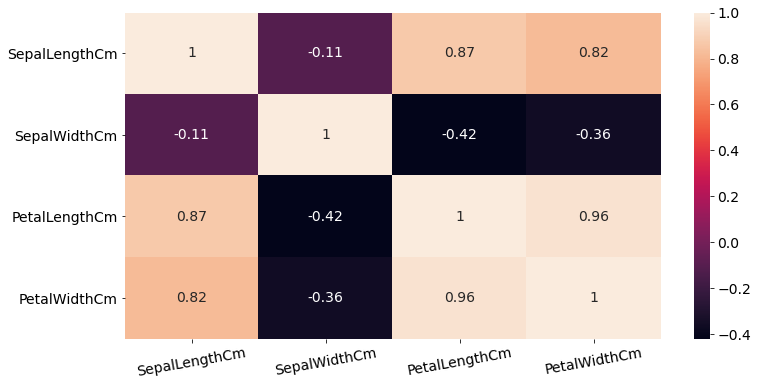

In [7]:
sns.heatmap(data.corr(), annot=True, cmap='rocket')
plt.xticks(rotation=10)
plt.show()

***
In the above `correlation heatmap`, we can see that -
1. `Sepal length` behaves along `petal sizes` a bit.
2. Whereas `Sepal Width` does not like to correlate with any other parameter.
3. About `Petal sizes`, they show great correlation with bith `sepal sizes`.
***
# Model Training and Predictions
***

In [8]:
# Let's sort out input data

X = data.drop(['Species'], axis=1).values
y = data.Species.values

In [40]:
classes = data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

***
There are lot of `Unsupervised` machine learning algorithms available. but here, I am using `K-means` beacause it has really easy to use syntax and provides desired output very cost effectively and result are super easy to understand! K-means use a concept called as `n_clusters` i.e. number of cluseters in which scatter pointer are to be gathered. The way to find `n_cluster` value is to use `Elbow Method/Curve`.
> __Elbow Curve__ - Curve of Squared sum of distances of each data point in all clusters to their respective centroids (within cluster sum of squres `(WCSS)` ) AGINST Number of clusters.

As name suggests, the point from which `curve deviation starts to reduce` on large scale is an ideal point to pick for number of clusters i.e. `n_clusers`.
***

In [17]:
from sklearn.cluster import KMeans

In [18]:
squared_sum_distances = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=2020)
    kmeans.fit(X)
    squared_sum_distances.append(kmeans.inertia_)

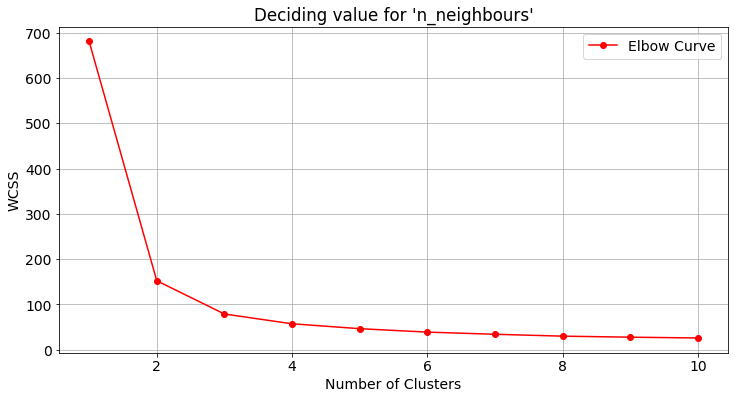

In [19]:
plt.plot(range(1, 11), squared_sum_distances, 'r-o')
plt.grid()
plt.title("Deciding value for 'n_neighbours'")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend(['Elbow Curve'])
plt.show()

***
As we can see above, at number of cluster __3__ the elbow curve starts to deviate lesser and lesser i.e. the point of deviation. So we take `n_cluster=3`. <br>
Now let's train out model using this findings and make predictions!
***

In [27]:
kmeans = KMeans(n_clusters=3, random_state=2020)
predictions = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# These are center points (Centroid) picked by K-means algorithm for each cluster (here, 3)
# it has created for each training columns.
centers

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

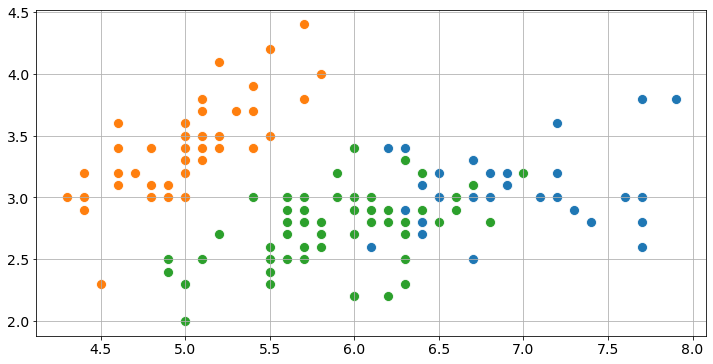

In [28]:
# PLotting data-points predicted by K-means algorithm ...

sns.scatterplot(x = X[predictions == 0, 0], y = X[predictions == 0, 1], s = 100)
sns.scatterplot(x = X[predictions == 1, 0], y = X[predictions == 1, 1], s = 100)
sns.scatterplot(x = X[predictions == 2, 0], y = X[predictions == 2, 1], s = 100)

plt.grid()
plt.show()

***
In this graph, we are looking at clusters formed by K-means which kinda resembles original data-points!
# ;)
Let's take a look into paired comparison of both `original` and `predicted` values for better understanding.
***
# Predicted Data Analysis
***

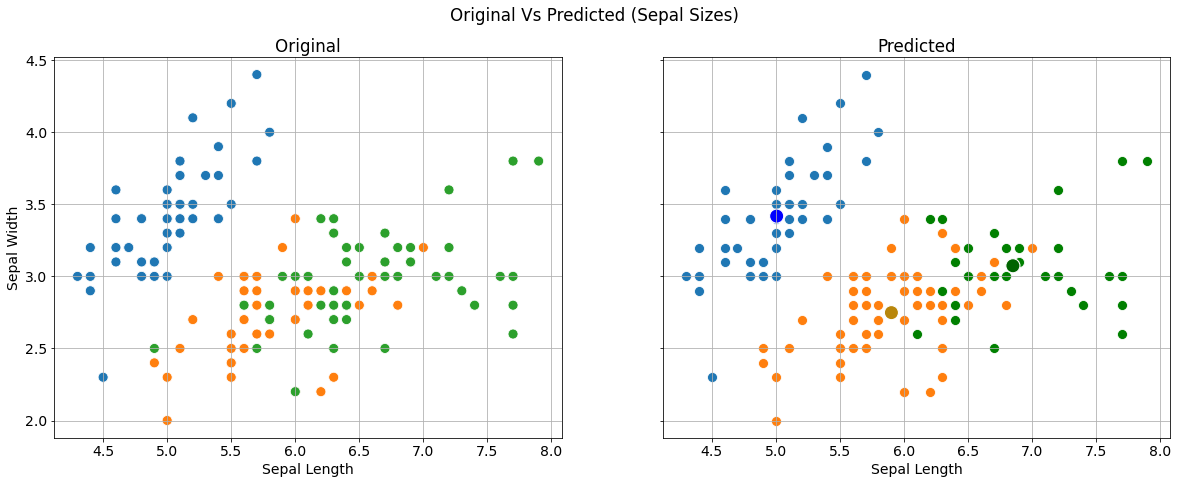

In [76]:
# Plotting a pair plot of original and predicted data for sepal sizes

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 7))

# Original

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=data.Species, s=100, ax=ax[0])
ax[0].grid()
ax[0].legend([], [], frameon=False)
ax[0].set_ylabel('Sepal Width')
ax[0].set_xlabel('Sepal Length')
ax[0].title.set_text('Original')


# Predicted

colors = np.array(['green'])

sns.scatterplot(x = X[predictions == 0, 0], y = X[predictions == 0, 1], s = 100, ax = ax[1], c=colors,)
sns.scatterplot(x = X[predictions == 1, 0], y = X[predictions == 1, 1], s = 100, ax = ax[1])
sns.scatterplot(x = X[predictions == 2, 0], y = X[predictions == 2, 1], s = 100, ax = ax[1])

colors = np.array(['darkgreen', 'blue', 'darkgoldenrod'])

sns.scatterplot(x = centers[:, 0], y = centers[:, 1], s = 200, c = colors, ax = ax[1])
ax[1].grid()
ax[1].set_xlabel('Sepal Length')
ax[1].title.set_text('Predicted')

plt.suptitle('Original Vs Predicted (Sepal Sizes)')
plt.show()

***
As we can see, both scatter plots look quite similar to the extent. Large dots in `predicted` plot represents centroids of each cluster seperated by different colors. Though there are some data points which are `predicted incorrectly` like most of the __green__ dots in original plot are predicted as orange in predicted plot, it still follows the trend like original data. For __blue__ points almost every point is also predicted correctly. Whereas, __orange__ dots got under over prediction.<br>
This was for only `Sepal length and width`. Let's take look into `Petal sizes` and respective predictions too for cross check!
***

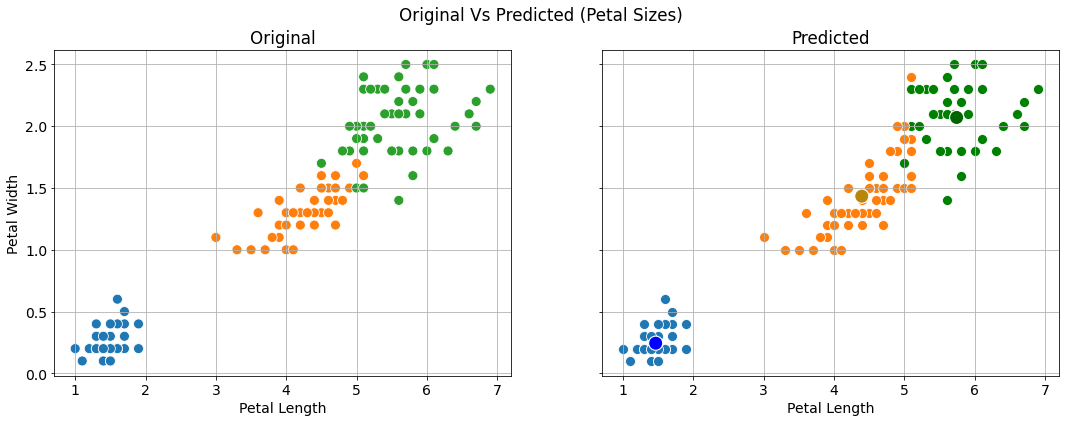

In [78]:
# Plotting a pair plot of original and predicted data for petal sizes

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(18, 6))

# Original

sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=data.Species, s=100, ax=ax[0])
ax[0].grid()
ax[0].legend([], [], frameon=False)
ax[0].set_ylabel('Petal Width')
ax[0].set_xlabel('Petal Length')
ax[0].title.set_text('Original')


# Predicted

colors = np.array(['green'])

sns.scatterplot(x = X[predictions == 0, 2], y = X[predictions == 0, 3], s = 100, ax = ax[1], c=colors,)
sns.scatterplot(x = X[predictions == 1, 2], y = X[predictions == 1, 3], s = 100, ax = ax[1])
sns.scatterplot(x = X[predictions == 2, 2], y = X[predictions == 2, 3], s = 100, ax = ax[1])

colors = np.array(['darkgreen', 'blue', 'darkgoldenrod'])

sns.scatterplot(x = centers[:, 2], y = centers[:, 3], s = 200, c = colors, ax = ax[1])
ax[1].grid()
ax[1].set_xlabel('Petal Length')
ax[1].title.set_text('Predicted')

plt.suptitle('Original Vs Predicted (Petal Sizes)')
plt.show()

***
Here, for `petal sizes` the same trend has been followed. For __blue__ points almost every point is also predicted correctly. Whereas, model predicted few of __green__ members as members of __orange__. Otherwise, our model did a great job!
***
# Cnclusion and Comments
Since this was an `Unsupervised learning` problem, we have to focus on how model is predicting clusters than actual values. Aside from few green points were predicted as orange, our model manage to `predict and find pattern` as original dataset which is great achievement !
***